<a href="https://colab.research.google.com/github/Jawakar-7/Natural-Language-Processing-Specialization-Coursera/blob/main/Digit_Recognition_using_Keras_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.datasets import mnist

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of handwritten digit images. Each image is grayscale and has a resolution of 28x28 pixels, representing a digit from 0 to 9.

In [13]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

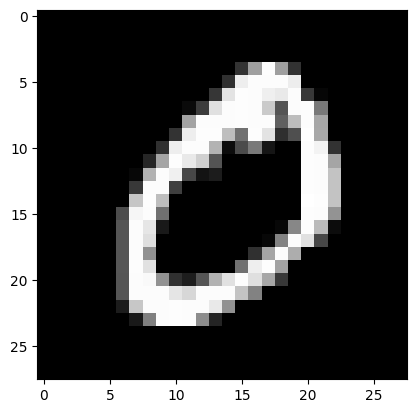

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_x[1],cmap='gray')
plt.show()

In [15]:
train_x.shape

(60000, 28, 28)

# Preprocessing

Convolutional neural networks takes only four dimensional data as input, so we will be transforming this data using .reshape() function and also normalize it .
Before doing this we will change the data type to int32


In [16]:
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_x=train_x/255
test_x=test_x/255

In [17]:
train_x=train_x.reshape(train_x.shape[0],28,28,1)
test_x=test_x.reshape(test_x.shape[0],28,28,1)

Since these are categorical values we will use one hot encoding to break the columns and simplify it . we will use "***to_categorical***' function from keras .
### Note that we are transforming the output Y here from vectors to matrices by doing one hot encoding

In [18]:
from keras.utils import to_categorical as tc
train_y=tc(train_y,num_classes=10)
test_y=tc(test_y,num_classes=10)

## **Creating a model with the sequential API**
This is tradional sequential model similar to ANN
The problem with the sequential API is that it doesn’t allow models to have multiple inputs or outputs, which are needed for some problems.

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
x=Sequential([
    Conv2D(filters=32,kernel_size=[5,5],activation='relu',input_shape=train_x.shape[1:]),
    Conv2D(filters=32,kernel_size=[5,5],activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    Conv2D(filters=64,kernel_size=[3,3],activation='relu'),
    Conv2D(filters=64,kernel_size=[3,3],activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense( units=256,activation='relu'),
    Dropout(0.50),
    Dense(units=10,activation='softmax')
])

## Functional API
Now we will try the same convolutional model with Functional approach instead of sequential

In [20]:
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,Input

inputs=Input(shape=train_x.shape[1:])

x=Conv2D(filters=32,kernel_size=(5,5),activation='relu')(inputs)
x=Conv2D(filters=32,kernel_size=(5,5),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x=Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x=Dropout(0.25)(x)

x=Dense(units=256,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.50)(x)

Predictions=Dense(units=10,activation='softmax')(x)

model=Model(inputs=inputs,outputs=Predictions)


Before we can start training our model we need to configure the learning process. For this, we need to specify an optimizer, a loss function and optionally some metrics like accuracy.

The loss function is a measure on how good our model is at achieving the given objective.

An optimizer is used to minimize the loss(objective) function by updating the weights using the gradients.

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

The ImageDataGenerator class in Keras is a powerful tool for generating augmented image data on-the-fly during model training. It allows you to apply various image transformations, such as rotation, flipping, zooming, and more, to augment the training dataset and increase its diversity. This augmentation helps improve the model's generalization and robustness by exposing it to variations in the input data.

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

In large datasets, it is computationally expensive to process the entire dataset at once during training. Instead, the data is divided into smaller subsets called batches.

In [26]:
epochs = 10
batch_size = 32
history = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size), epochs=epochs,
                              validation_data=(test_x, test_y), steps_per_epoch=train_x.shape[0]//batch_size)

Epoch 1/10
   1/1875 [..............................] - ETA: 1:49 - loss: 0.0151 - accuracy: 1.0000

<ipython-input-26-2077d1153ca7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size), epochs=epochs,


1875/1875 [==============================] - 34s 18ms/step - loss: 0.0733 - accuracy: 0.9779 - val_loss: 0.0228 - val_accuracy: 0.9922
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0605 - accuracy: 0.9823 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0587 - accuracy: 0.9827 - val_loss: 0.0232 - val_accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.0225 - val_accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0226 - val_accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0191 - val_accura

##Visualizing the training process
history.history['acc']: history is a dictionary returned by the fit or fit_generator function when training the model. It contains the training metrics recorded at the end of each epoch. 'acc' represents the training accuracy, which is the accuracy of the model on the training data at the end of each epoch.


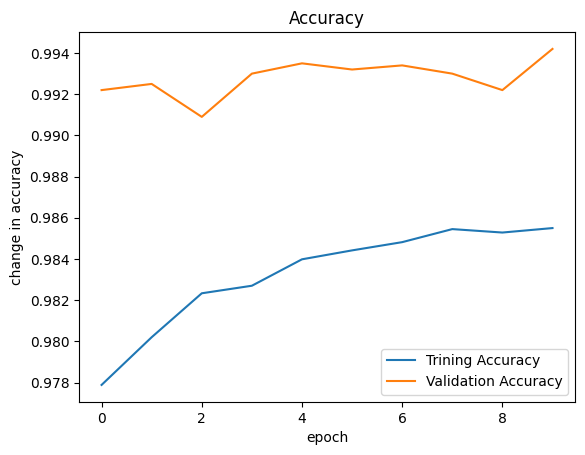

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Trining Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('change in accuracy')
plt.legend()

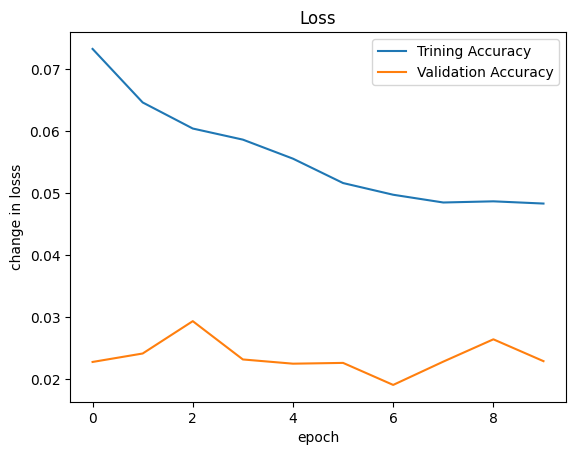

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Trining Accuracy')
plt.plot(history.history['val_loss'],label='Validation Accuracy')
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('change in losss')
plt.legend()